In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plotAll(df):
    plt.figure()
    for val in list(df):
        plt.plot(df.index, df[val], label=val)
    plt.yscale("log")
    plt.xlabel("$m$ [GeV]")
    plt.ylabel("$\sigma$ [pb]")
    plt.legend()
    plt.show()


# BSM Higgs --- no EWcorr, large mass range

## 8 TeV LHC

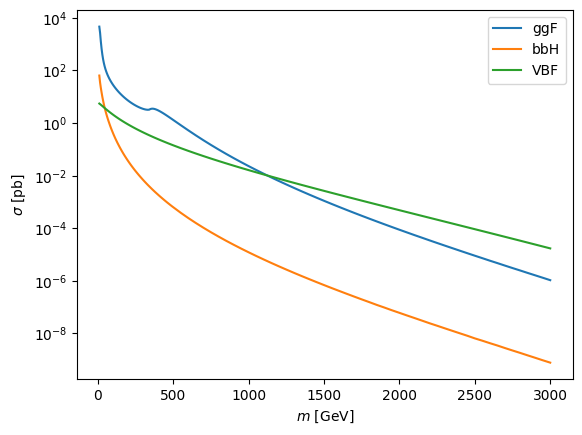

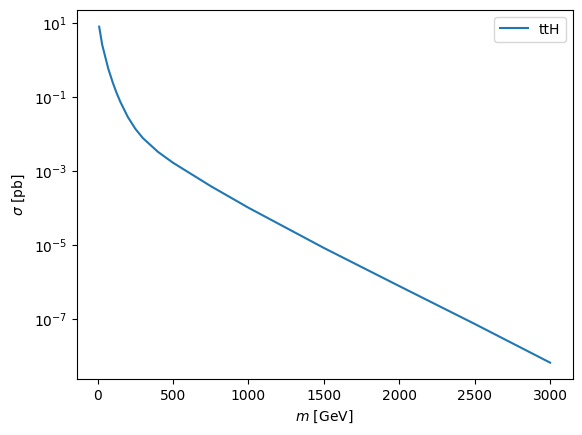

In [3]:
lhc8_BSM_YR4 = pd.read_excel(
    "https://twiki.cern.ch/twiki/pub/LHCPhysics/LHCHWG/Higgs_XSBR_YR4_update.xlsx",
    header=[1, 2],
    sheet_name="YR4 BSM 8TeV",
    skiprows=[3, 4],
    skipfooter=2,
)
assert np.allclose(lhc8_BSM_YR4.ggF.MH, lhc8_BSM_YR4.VBF.MH)
assert np.allclose(lhc8_BSM_YR4.ggF.MH, lhc8_BSM_YR4.bbH.MH)

lhc8 = pd.DataFrame(
    {
        "mH": lhc8_BSM_YR4.ggF.MH,
        "ggF": lhc8_BSM_YR4.ggF.Cross,
        "bbH": lhc8_BSM_YR4.bbH.Cross,
        "VBF": lhc8_BSM_YR4.VBF.Cross,
    }
).set_index("mH")
lhc8_ttH = (
    pd.DataFrame({"mH": lhc8_BSM_YR4["ttH", "MH"], "ttH": lhc8_BSM_YR4["ttH", "Cross"]})
    .dropna()
    .set_index("mH")
)

plotAll(lhc8)
plotAll(lhc8_ttH)


## 13 TeV LHC

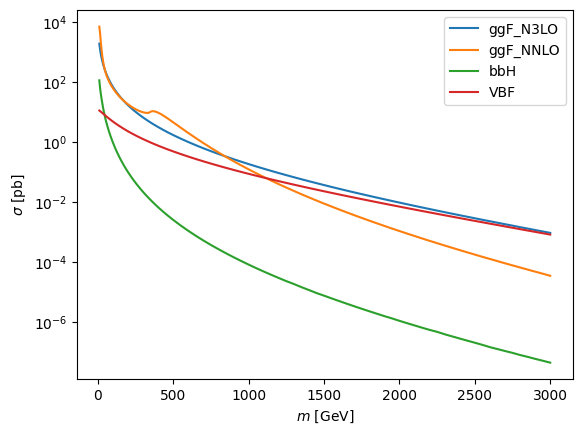

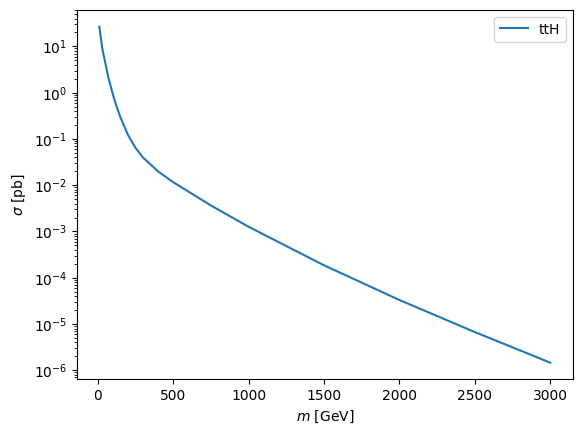

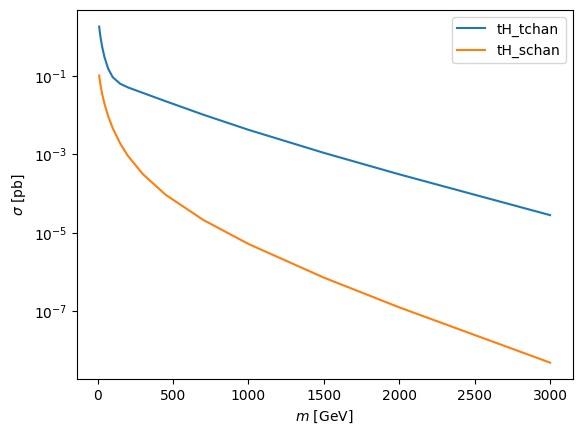

In [4]:
lhc13_BSM_YR4 = pd.read_excel(
    "https://twiki.cern.ch/twiki/pub/LHCPhysics/LHCHWG/Higgs_XSBR_YR4_update.xlsx",
    header=[1, 2],
    sheet_name="YR4 BSM 13TeV",
    skiprows=[3, 4],
    skipfooter=2,
)
assert np.allclose(
    lhc13_BSM_YR4["ggF (N3LO)", "MH"],
    lhc13_BSM_YR4["ggF (NNLO+NNLL)", "MH"],
)
assert np.allclose(lhc13_BSM_YR4["ggF (N3LO)", "MH"], lhc13_BSM_YR4.VBF.MH)
assert np.allclose(lhc13_BSM_YR4["ggF (N3LO)", "MH"], lhc13_BSM_YR4.bbH.MH)
assert np.allclose(lhc8.index, lhc13_BSM_YR4["ggF (N3LO)", "MH"])


lhc13 = pd.DataFrame(
    {
        "mH": lhc13_BSM_YR4["ggF (N3LO)", "MH"],
        "ggF_N3LO": lhc13_BSM_YR4["ggF (N3LO)", "Cross"],
        "ggF_NNLO": lhc13_BSM_YR4["ggF (NNLO+NNLL)", "Cross"],
        "bbH": lhc13_BSM_YR4.bbH.Cross,
        "VBF": lhc13_BSM_YR4.VBF.Cross,
    }
).set_index("mH")

lhc13_ttH = (
    pd.DataFrame(
        {"mH": lhc13_BSM_YR4["ttH", "MH"], "ttH": lhc13_BSM_YR4["ttH", "Cross"]}
    )
    .dropna()
    .set_index("mH")
)

assert np.allclose(
    lhc13_BSM_YR4["tH (t-ch)", "MH"].dropna(),
    lhc13_BSM_YR4["tH (s-ch)", "MH"].dropna(),
)

lhc13_tH = (
    pd.DataFrame(
        {
            "mH": lhc13_BSM_YR4["tH (t-ch)", "MH"],
            "tH_tchan": lhc13_BSM_YR4["tH (t-ch)", "Cross"],
            "tH_schan": lhc13_BSM_YR4["tH (s-ch)", "Cross"],
        }
    )
    .dropna()
    .set_index("mH")
)

plotAll(lhc13)
plotAll(lhc13_ttH)
plotAll(lhc13_tH)


### "interpolation" between N3LO and NNLO ggH XS

In [6]:
lhc13ggH = lhc13.drop(['bbH', 'VBF'], axis=1)
lhc13ggH['ggF_inter'] = pd.concat([lhc13ggH['ggF_N3LO'][:29], lhc13ggH['ggF_NNLO'][29:]])

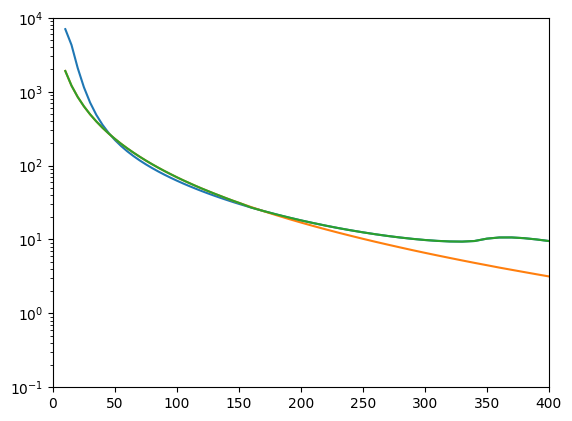

In [7]:
fig, ax = plt.subplots()

plt.plot(lhc13ggH.index, lhc13ggH['ggF_NNLO'])
plt.plot(lhc13ggH.index, lhc13ggH['ggF_N3LO'])
plt.plot(lhc13ggH.index, lhc13ggH['ggF_inter'])

plt.xlim([0, 400])
plt.ylim([1e-1, 1e4])
plt.yscale('log')

plt.show()

# SM EW corrections

## 8TeV LHC

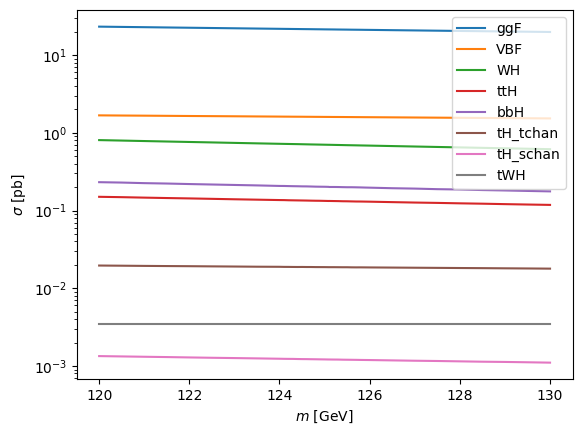

In [10]:
lhc8_SM_YR4 = pd.read_excel(
    "https://twiki.cern.ch/twiki/pub/LHCPhysics/LHCHWG/Higgs_XSBR_YR4_update.xlsx",
    header=[1, 2],
    sheet_name="YR4 SM 8TeV",
    skiprows=[3, 4],
    skipfooter=2,
)
lhc8_SM = (
    lhc8_SM_YR4[
        [
            ("ggF (N3LO QCD + NLO EW)", "Cross"),
            ("VBF", "Cross"),
            ("WH", "Cross"),
            ("ttH", "Cross"),
            ("bbH", "Cross"),
            ("tH (t-ch)", "Cross"),
            ("tH (s-ch)", "Cross"),
        ]
    ]
    .droplevel(1, axis=1)
    .rename(
        columns={
            "ggF (N3LO QCD + NLO EW)": "ggF",
            "tH (t-ch)": "tH_tchan",
            "tH (s-ch)": "tH_schan",
        }
    )
)
lhc8_SM["mH"] = lhc8_SM_YR4.VBF.MH
lhc8_SM["tWH"] = np.max(lhc8_SM_YR4["tH (W-associated)", "Cross"])
lhc8_SM.set_index("mH", inplace=True)

plotAll(lhc8_SM)

## 13 TeV LHC

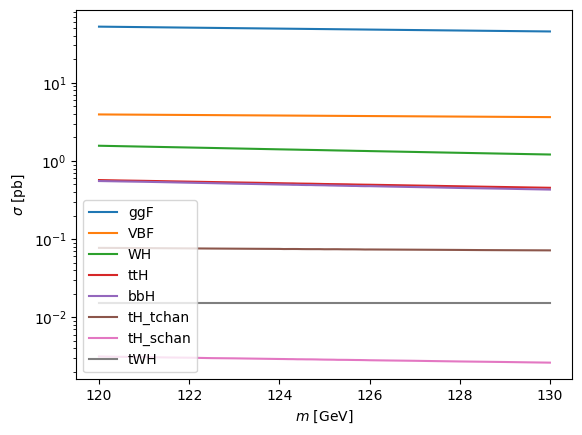

In [11]:
lhc13_SM_YR4 = pd.read_excel(
    "https://twiki.cern.ch/twiki/pub/LHCPhysics/LHCHWG/Higgs_XSBR_YR4_update.xlsx",
    header=[1, 2],
    sheet_name="YR4 SM 13TeV",
    skiprows=[3, 4],
    skipfooter=2,
)
lhc13_SM = (
    lhc13_SM_YR4[
        [
            ("ggF (N3LO QCD + NLO EW)", "Cross"),
            ("VBF", "Cross"),
            ("WH", "Cross"),
            ("ttH", "Cross"),
            ("bbH", "Cross"),
            ("tH (t-ch)", "Cross"),
            ("tH (s-ch)", "Cross"),
        ]
    ]
    .droplevel(1, axis=1)
    .rename(
        columns={
            "ggF (N3LO QCD + NLO EW)": "ggF",
            "tH (t-ch)": "tH_tchan",
            "tH (s-ch)": "tH_schan",
        }
    )
)
lhc13_SM["mH"] = lhc13_SM_YR4.VBF.MH
lhc13_SM["tWH"] = np.max(lhc13_SM_YR4["tH (W-associated)", "Cross"])
lhc13_SM.set_index("mH", inplace=True)

assert np.allclose(lhc8_SM.index, lhc13_SM.index)

plotAll(lhc13_SM)

# Export to C++ file

In [12]:
from helpers import *

with cppDataFile(
    "../src/predictions/data/YR4Cxns.cpp", scriptname="tools/getYR4cxns.ipynb"
) as cppf:
    cppf.write("const auto bsmGridCxns = ")
    cppf.write(grid2CppString([lhc8.index.values]))

    cppf.write("const auto lhc8ggF = ")
    cppf.write(values2CppString(lhc8.ggF.values))

    cppf.write("const auto lhc13ggFN2lo = ")
    cppf.write(values2CppString(lhc13.ggF_NNLO.values))

    cppf.write("const auto lhc13ggFN3lo = ")
    cppf.write(values2CppString(lhc13.ggF_N3LO.values))

    cppf.write("const auto lhc13ggFinterp = ")
    cppf.write(values2CppString(lhc13ggH.ggF_inter.values))

    for e, df in zip((8, 13), (lhc8, lhc13)):
        cppf.write("const auto lhc{}bbH = ".format(e))
        cppf.write(values2CppString(df.bbH.values))
        cppf.write("const auto lhc{}vbf = ".format(e))
        cppf.write(values2CppString(df.VBF.values))

    cppf.write("const auto HttGrid = ")
    cppf.write(grid2CppString([lhc8_ttH.index.values]))

    for e, df in zip((8, 13), (lhc8_ttH, lhc13_ttH)):
        cppf.write("const auto lhc{}Htt = ".format(e))
        cppf.write(values2CppString(df.ttH.values))

    cppf.write("const auto HtGrid = ")
    cppf.write(grid2CppString([lhc13_tH.index.values]))

    for ch in ("tchan", "schan"):
        cppf.write("const auto lhc13{}Ht = ".format(ch))
        cppf.write(values2CppString(lhc13_tH["tH_{}".format(ch)].values))

    cppf.write("const auto smGridCxns = ")
    cppf.write(grid2CppString([lhc13_SM.index.values]))

    for e, df in zip((8, 13), (lhc8_SM, lhc13_SM)):
        for p in list(df):
            cppf.write("const auto lhc{}{}SMEW = ".format(e, p))
            cppf.write(values2CppString(df[p].values))
